<IPython.core.display.Javascript object>


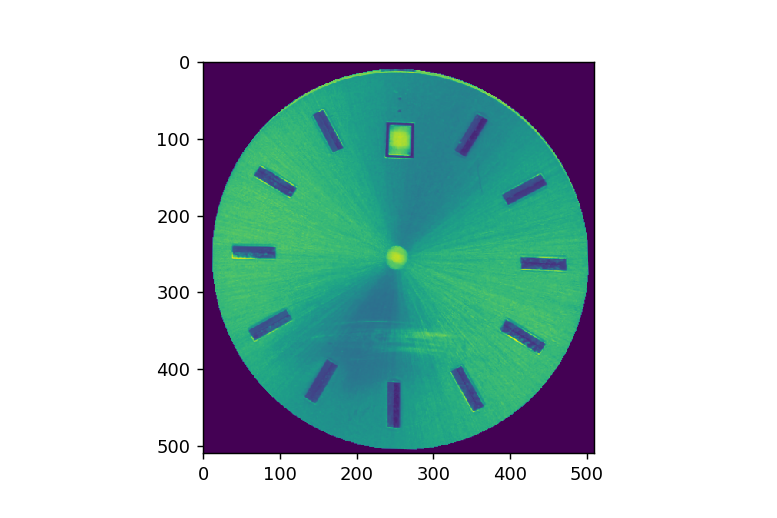

9

In [81]:
import numpy as np
import cv2
import os
from skimage.measure import compare_ssim
from skimage import io
from skimage.filters import threshold_mean, gaussian
from skimage.util import img_as_ubyte
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib notebook
%config InlineBackend.close_figures=False 

SAVE_TITLE = "watch_labels.txt"
fig,ax = plt.subplots()
img = io.imread("sample_match.png")
pic = img.copy()
ax.imshow(pic)
global drawmode
drawmode = "roi_box"
global pos, digits
pos = []; digits = []; key = []; rois = [];

def plot_bboxes(points, ax, color):
    for i in range(0, len(points)- len(points)%2, 2):
        p1 = points[i]
        p2 = points[i+1]
        lower_left_point = (min(p1[0],p2[0]), min(p1[1],p2[1]))
        upper_right_point = (max(p1[0],p2[0]), max(p1[1],p2[1]))
        w = max(p1[0],p2[0]) - min(p1[0], p2[0])
        h = max(p1[1],p2[1]) - min(p1[1], p2[1])
        rect = Rectangle(lower_left_point,w,h,linewidth=1,edgecolor=color,facecolor='none')
        ax.add_patch(rect)
def save_roi():
    # TODO THIS NEEDS TO CHANGGGGGGGE
    # TODO 2: careful about the x/y, i/j thing in opencv/skimage
    with open(SAVE_TITLE, "w") as savefile:
        general_roi = "".join(["{};{};roi; \n".format(i1,j1,i2,j2) for (i,j) in pos])
        digit_roi = "".join(["{};{};digit; \n".format(i,j) for (i,j) in digits])
        savefile.write(general_roi)
        savefile.write(digit_roi)
    
def onclick(event):
    if drawmode == "roi_box":
        pos.append((event.xdata,event.ydata))
    elif drawmode == "digits":
        digits.append((event.xdata,event.ydata))
    ax.scatter(*zip(*pos), color="red", s=4)
    plot_bboxes(pos, ax, "green")
    plot_bboxes(digits, ax, "red")
    fig.show()

def onkey(event):
    if event.key == "u":
        key.append("resetting labels")
        plt.cla()
        global pos, digits
        pos = []; digits = [];
        pic = img.copy()
        ax.imshow(pic)
        fig.show()
    elif event.key == "d":
        key.append("labeling digits")
        global drawmode
        drawmode = "digits"
    elif event.key == "r":
        key.append("r registered")
        drawmode = "roi_box"
    elif event.key == "s":
        key.append("s registered")
        save_roi()
    #print "you pressed {} {} {}".format(event.key, event.xdata, event.ydata)
fig.canvas.mpl_connect('key_press_event', onkey)
fig.canvas.mpl_connect('button_press_event', onclick)

In [63]:
print key
print pos
print digits

with open(SAVE_TITLE, "w") as savefile:
    general_roi = "".join(["{};{};roi; \n".format(i,j) for (i,j) in pos])
    digit_roi = "".join(["{};{};digit; \n".format(i,j) for (i,j) in digits])
    savefile.write(general_roi)
    savefile.write(digit_roi)


['s registered']
[(238.18588125468887, 41.74878111370424), (273.36800045998689, 86.312798773748398), (137.33047286616784, 62.858052636883031), (188.93091436727161, 123.84039259273294), (320.27749273371751, 67.54900186425607), (376.56888346219432, 128.53134182010598), (383.60530730325399, 142.60418950222521), (449.278596486477, 198.89558023070202), (409.40552805380582, 236.42317404968657), (482.11524107808839, 280.98719170973072), (381.25983268956747, 332.5876332108345), (456.31502032753656, 386.53354932562479), (315.58654350634447, 393.56997316668435), (376.56888346219432, 463.93421157728039), (228.80398279994273, 407.64282084880358), (273.36800045998689, 482.69800848677266), (123.25762518404866, 388.87902393931131), (186.58543975358509, 449.86136389516116), (52.893386773452619, 320.86026014240178), (123.25762518404866, 374.80617625719208), (36.475064477646868, 227.04127559494043), (102.14835366086982, 273.95076786867111), (64.620759841885274, 133.22229104747908), (130.29404902510828, 

In [82]:
with open(SAVE_TITLE,"r") as readfile:
    dr = []
    br = []
    for line in readfile.readlines():
        lit = line.replace("\n","").split(";")
        # print lit
        if lit[2] == "digit":
            dr.append([float(n) for n in lit[:2]])
        elif lit[2] == "roi":
            br.append([float(n) for n in lit[:2]])
print br[0]

[238.185881255, 41.7487811137]


73.3428571429 7.01587301587
1.09484777518 0.0746487119438
2.55190796857 0.119248035915
(510, 510, 3) (510, 510, 3)


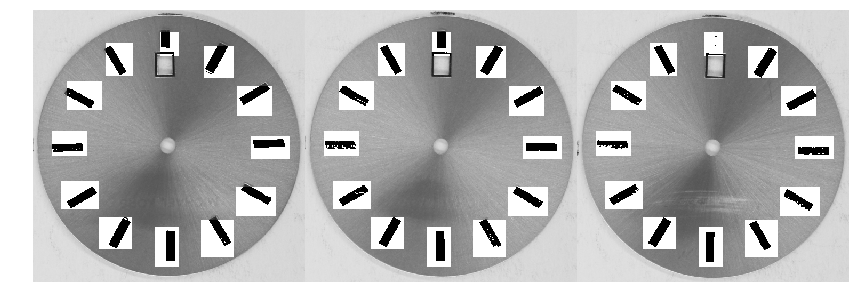

In [148]:
## compare stuff here:
%matplotlib inline
def quick_fig(img):
    plt.figure(figsize=(16,5)) 
    plt.imshow(img)
    plt.axis("off")
gd1 = io.imread("good_cropped/g1.png")
gd2 = io.imread("good_cropped/g4.png")
bd = io.imread("good_cropped/b3.png")

for i in range(0, len(br)- len(br)%2, 2):
    p1 = tuple([int(n) for n in br[i]])
    p2 = tuple([int(n) for n in br[i+1]])
    x1,y1 = p1
    x2,y2 = p2
    threshes = []
    for IM in (gd1,gd2,bd):
        # print threshold_mean(IM[y1:y2,x1:x2])
        jill = IM[y1:y2,x1:x2]
        gill = gd[y1:y2,x1:x2]
        thresh = np.mean(gill)
        jill[jill>thresh] = 255
        jill[jill<thresh] = 0
        nu_thresh = np.mean(jill)
        threshes.append(nu_thresh)
   
    #print threshes[0] - threshes[1]
    #print threshes[2] - threshes[0]
    if abs(threshes[2] - threshes[0]) > 5*abs(threshes[1] - threshes[0]):
        print abs(threshes[2] - threshes[0]), abs(threshes[1] - threshes[0])
        for IM in (gd1,gd2,bd):
            #(gd1,gd2,bd):
            # tungalunga = threshes[2] - threshes[0]
            # cv2.rectangle(IM, p1, p2, (0,0,255), -1)
            pass
    # print "newline"
        #cv2.rectangle(IM, p1, p2, (0,0,255), -1)

print gd.shape, bd.shape
quick_fig(np.hstack([gd1,gd2,bd]))
# image2